### Importation des modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Affichage de l'ensemble des colonnes
pd.set_option('display.max_row', 111)
pd.set_option('display.max_columns',None)

### Lecture du fichier

In [3]:
DF = pd.read_csv('https://simplonline-v3-prod.s3.eu-west-3.amazonaws.com/media/file/csv/87e3ec06-a99f-42bf-b292-074d02f31a94.csv',sep ='\t')
df = DF.copy()
df.head(2)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0

# ANALYSE EXPLORATOIRE

### Affichons les dimensions

In [4]:
df.shape

(2240, 29)

### Types des colonnes

In [5]:
df.dtypes.value_counts()

int64      25
object      3
float64     1
dtype: int64

### Affichage des variables qualitatives

In [6]:
df.select_dtypes(include = object)

Education Marital_Status Dt_Customer
0     Graduation         Single  04-09-2012
1     Graduation         Single  08-03-2014
2     Graduation       Together  21-08-2013
3     Graduation       Together  10-02-2014
4            PhD        Married  19-01-2014
...          ...            ...         ...
2235  Graduation        Married  13-06-2013
2236         PhD       Together  10-06-2014
2237  Graduation       Divorced  25-01-2014
2238      Master       Together  24-01-2014
2239         PhD        Married  15-10-2012

[2240 rows x 3 columns]

In [7]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

#### Converion de la date de naissance en age

In [8]:
Age = 2021 - df['Year_Birth']
df['Year_Birth'] = Age
df.rename(columns = {'Year_Birth':'Age'}, inplace = True)
df.head(2)

ID  Age   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524   64  Graduation         Single  58138.0        0         0   
1  2174   67  Graduation         Single  46344.0        1         1   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0

<AxesSubplot:xlabel='Age', ylabel='Density'>

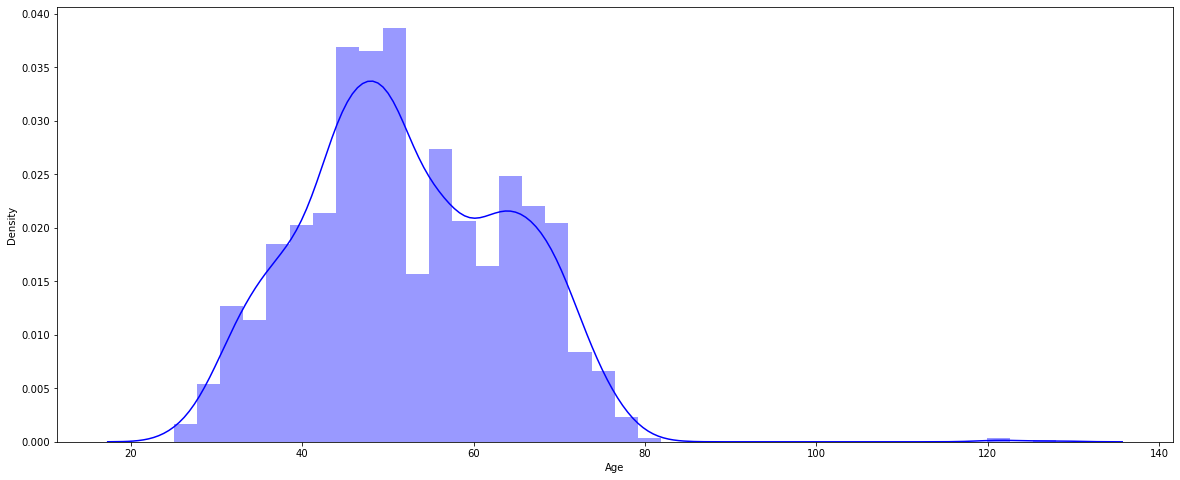

In [9]:
plt.figure(figsize=(20,8))
sns.distplot(df["Age"], color='blue')

La distribution de l'age des clients ne suit pas une loi normale

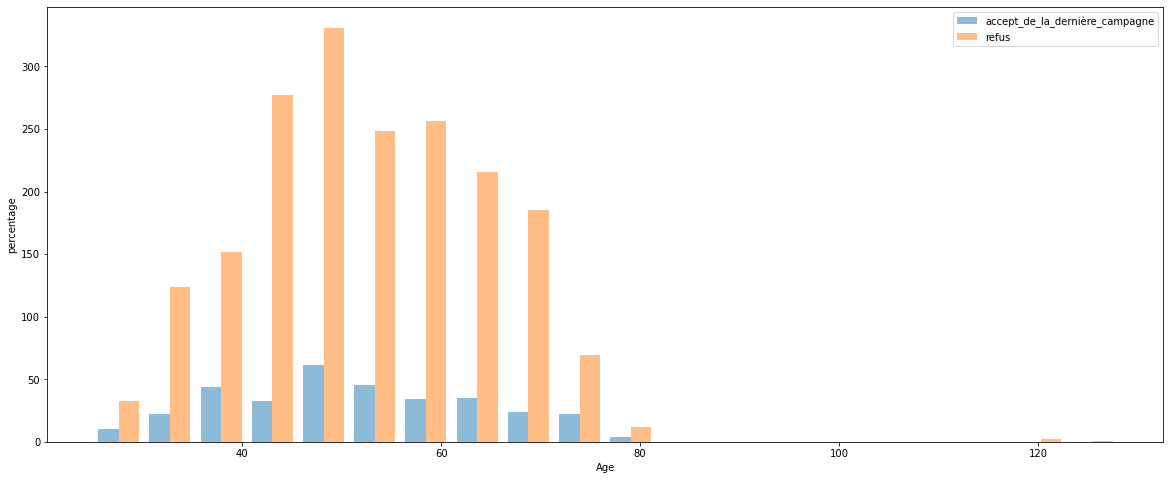

In [10]:
plt.figure(figsize=(20,8))
plt.hist([df[df.Response==1].Age, df[df.Response==0].Age], bins = 20, alpha = 0.5, label = ["accept_de_la_dernière_campagne","refus"])
plt.xlabel("Age")
plt.ylabel("percentage")
plt.legend()
plt.show()

On constate avec le diagramme ci-déssus que L'age des client ne semble pas avoir un impact à priori sur leur acceptation lors de la dèrnière campagne

### Dépenses Global des client en fonction des autres parametres

In [11]:
list_depenses = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth' ]

In [12]:
df['total_d'] = df[list_depenses].sum(axis=1)
df.head()

ID  Age   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524   64  Graduation         Single  58138.0        0         0   
1  2174   67  Graduation         Single  46344.0        1         1   
2  4141   56  Graduation       Together  71613.0        0         0   
3  6182   37  Graduation       Together  26646.0        1         0   
4  5324   40         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  total_d  
0              3         11         1     1649  
1              3         11         0       38  
2              3         11         0      801  
3              3         11         0       67  
4              3         11         0      446

#### Relation revenu vs dépenses du client

<AxesSubplot:xlabel='Income', ylabel='total_d'>

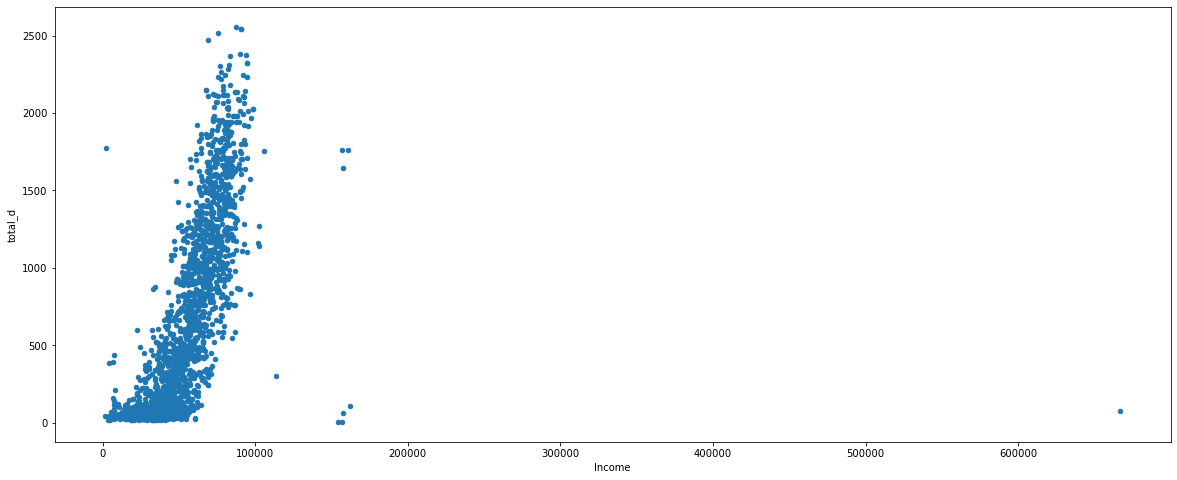

In [13]:
df.plot(kind='scatter', x='Income',y='total_d',figsize=(20,8))

D'après le graphe ci-déssus, nous pouvons dire qu'il semble y avoir une corrélation linéaire entre la somme des dépenses éffectuées par les clients et leur revenu. On constate que les clients qui font le plus d'achats sont ceux qui ont un revenu élevés.

#### L'éfficacité des différentes campagnes selon le niveau d'éducation et le statut matrimonial

In [14]:
list_acc = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']

In [15]:
a=0
for col in list_acc:
    a+=1
    print(((df[col] == 1).sum()/2240)*100,"% des clients ont accepté l'offre pendant la campagne",a)

6.428571428571428 % des clients ont accepté l'offre pendant la campagne 1
1.3392857142857142 % des clients ont accepté l'offre pendant la campagne 2
7.276785714285714 % des clients ont accepté l'offre pendant la campagne 3
7.455357142857142 % des clients ont accepté l'offre pendant la campagne 4
7.276785714285714 % des clients ont accepté l'offre pendant la campagne 5
14.910714285714285 % des clients ont accepté l'offre pendant la campagne 6


La deuxième campagne n'a pas connu de grand succès contrairement à la dèrnière. On peut dire que la stratégie de la dèrnière campagne est bonne à être répliquer.

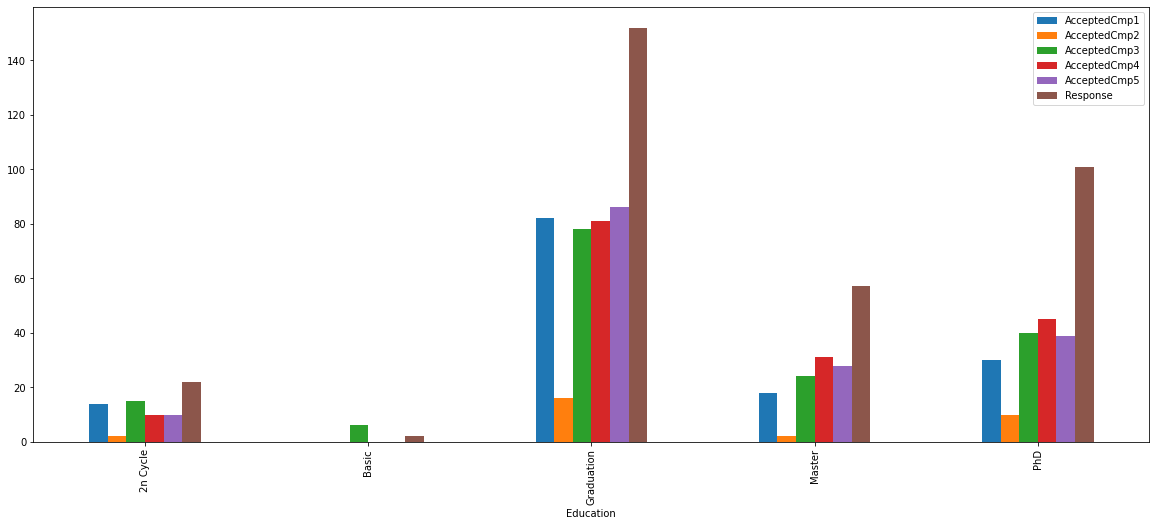

In [16]:
client_accept = df.groupby('Education').sum()[list_acc]
client_accept.plot(kind='bar',figsize=(20,8))
plt.show()

La plupart des clients qui ont accepté lors de la dernière campagne ont majoritairement un niveau élevé dans les études.

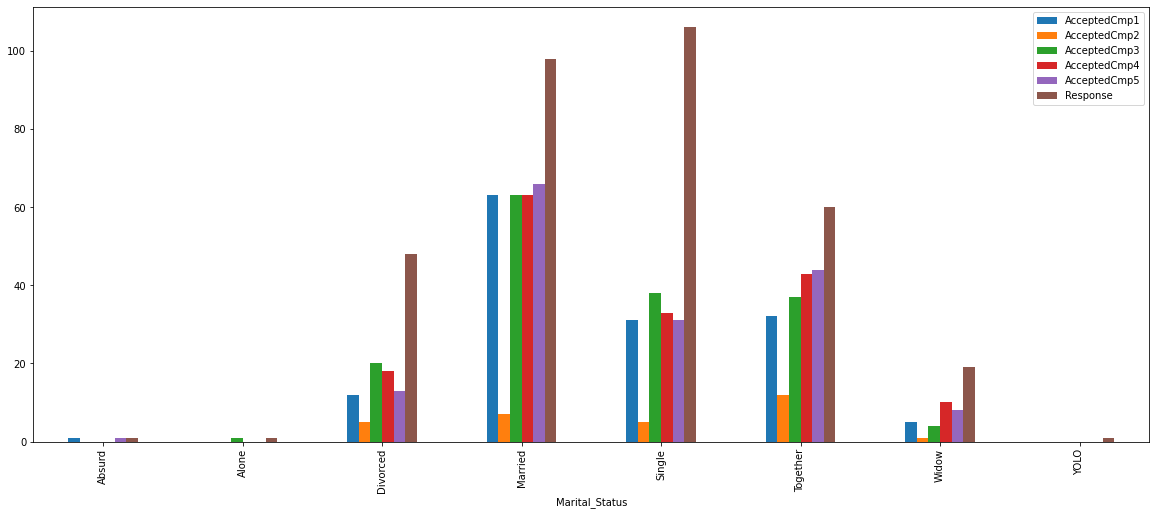

In [17]:
client_accept = df.groupby('Marital_Status').sum()[list_acc]
client_accept.plot(kind='bar',figsize=(20,8))
plt.show()

Que les clients soient mariés, célibataire ou en concubinage, ils sont plus susceptibles de repondre favorablement aux campagne contrairement autres.

<AxesSubplot:ylabel='Frequency'>

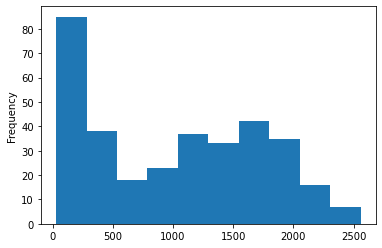

In [18]:
df[df['Response']==1]['total_d'].plot(kind='hist')

In [19]:
list_canal = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

In [20]:
for col in list_canal:
    print(df[col].sum())

5208
9150
5963
12970
11909


#### Lieu des différents achats selon le niveau d'éducation et du statut matrimonial

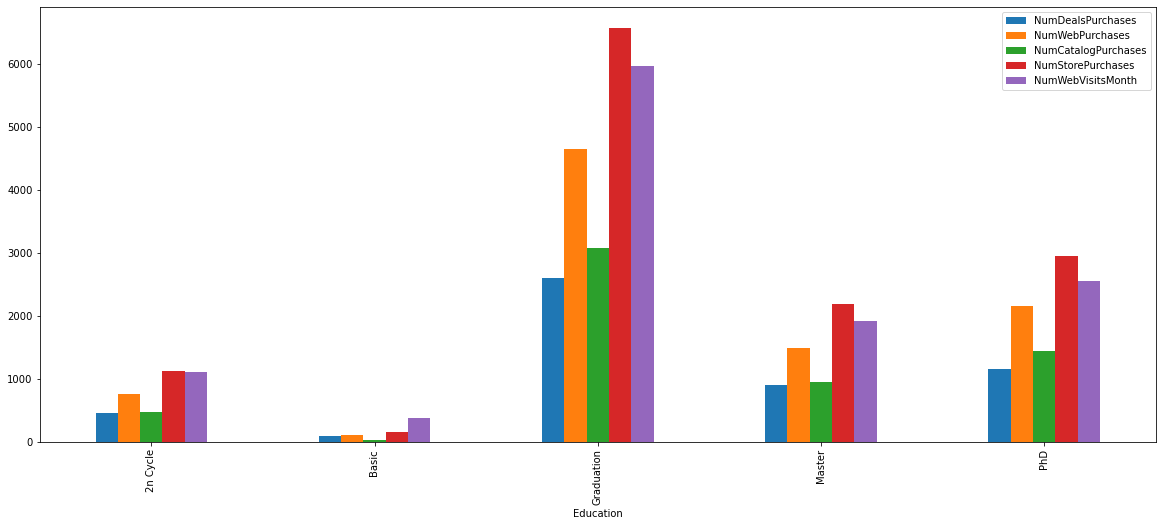

In [21]:
achat_client = df.groupby('Education').sum()[list_canal]
achat_client.plot(kind='bar',figsize=(20,8))
plt.show()

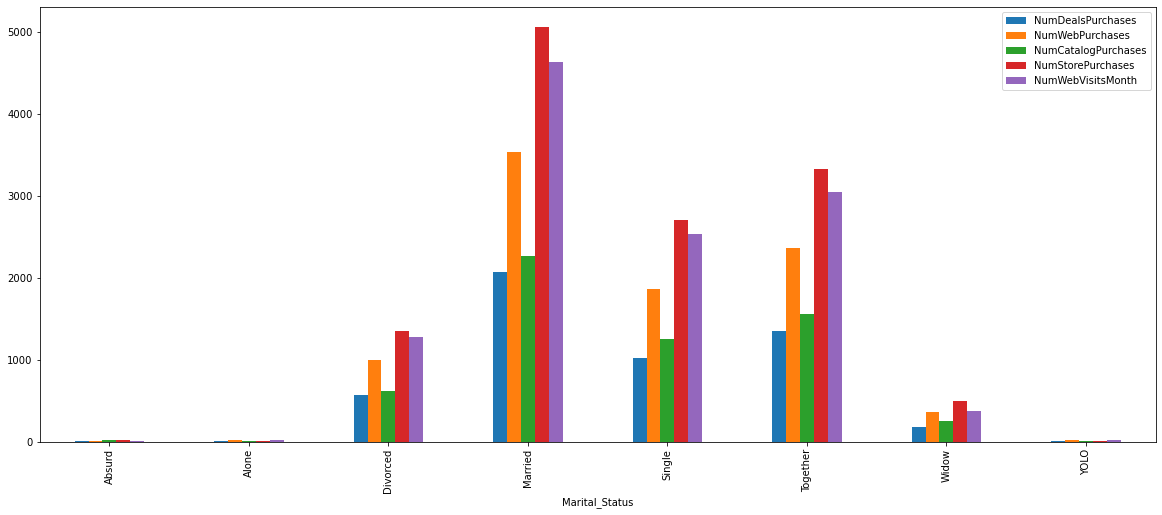

In [22]:
achat_client = df.groupby('Marital_Status').sum()[list_canal]
achat_client.plot(kind='bar',figsize=(20,8))
plt.show()

In [23]:
df['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [24]:
# seniority = pd.to_datetime(pd.datetime.now().date()) - pd.to_datetime(df['Dt_Customer'])
# type
# df['Dt_Customer'] = int(seniority)
# df.rename(columns = {'Dt_Customer':'seniority'}, inplace = True)
# df.head(2)

<AxesSubplot:ylabel='Complain'>

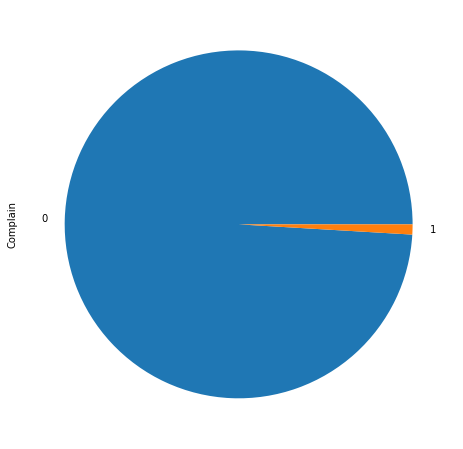

In [25]:
plt.figure(figsize=(20,8))
df['Complain'].value_counts().plot.pie()

#### Relation revenu vs plainte du client

In [26]:
df[df['Complain']==1]['total_d']
# plt.figure(figsize=(20,8))
# sns.countplot(hue='Complain', x='total_d', data=df)

78        25
147       34
192       76
271       75
355       63
358      916
590       95
972      110
1041      70
1069     932
1180     530
1201     787
1211     564
1277     114
1323     498
1461     665
1571      70
1720      23
1850    1399
1924    1226
2018      33
Name: total_d, dtype: int64

On remarque sur cette figure que les clients qui se sont plaint au moins une au cours des deux dèrnière années sont ceux qui achètent le moins

#### Relation revenu vs dépenses du client

<AxesSubplot:xlabel='Education'>

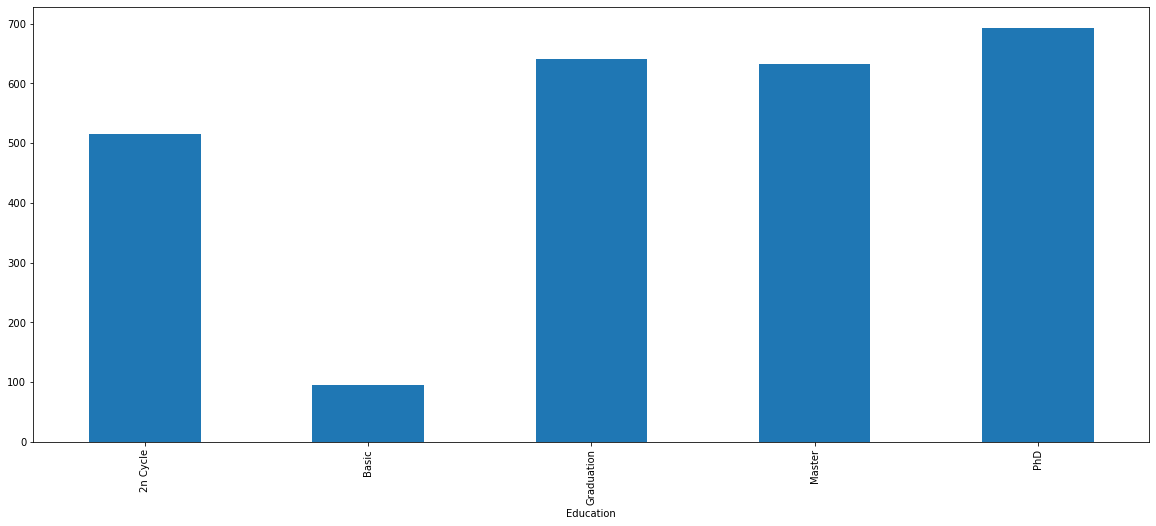

In [27]:
plt.figure(figsize=(20,8))
df.groupby(['Education'])['total_d'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Marital_Status'>

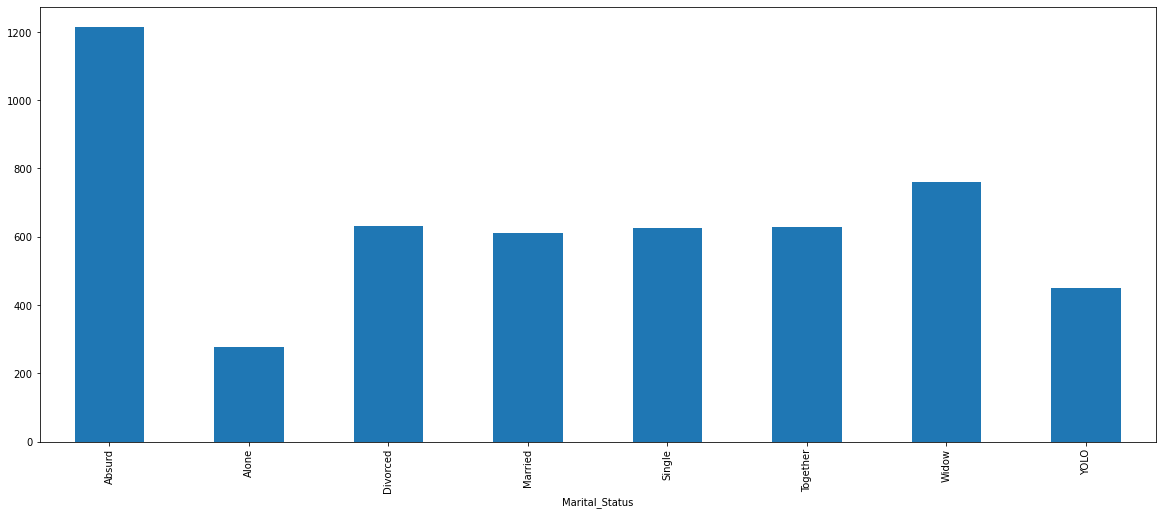

In [28]:
plt.figure(figsize=(20,8))
df.groupby(['Marital_Status'])['total_d'].mean().plot(kind='bar')

On constate que le niveau d'éducation des clients a un réel effet sur leurs achats. Les clients les plus éduqués sont ceux qui acchètent le plus.
De plus, les clients 'absurd' et les clients 'Widow' sont les plus gros acheteurs contrairement aux célibataires.

<AxesSubplot:xlabel='Income', ylabel='Density'>

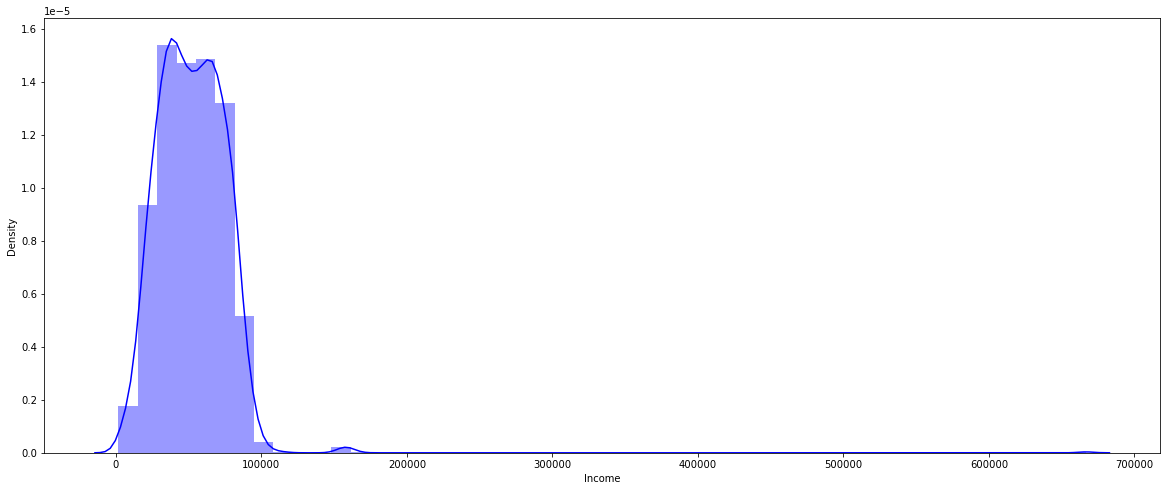

In [29]:
plt.figure(figsize=(20,8))
sns.distplot(df["Income"], color='blue')

<Figure size 432x288 with 0 Axes>

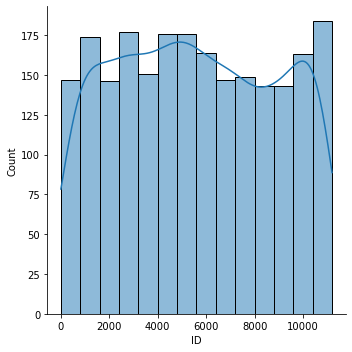

<Figure size 432x288 with 0 Axes>

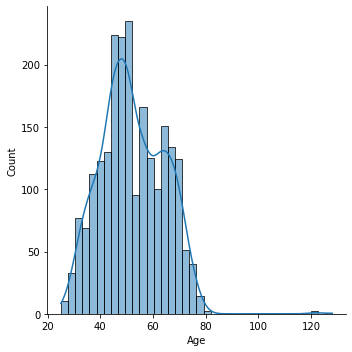

<Figure size 432x288 with 0 Axes>

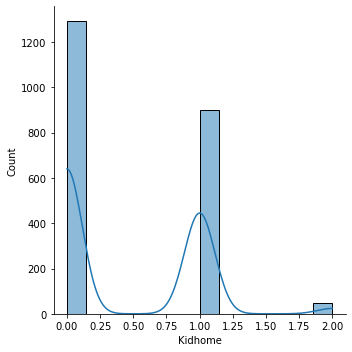

<Figure size 432x288 with 0 Axes>

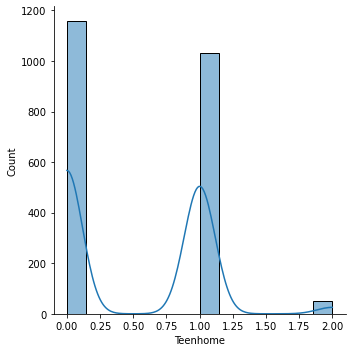

<Figure size 432x288 with 0 Axes>

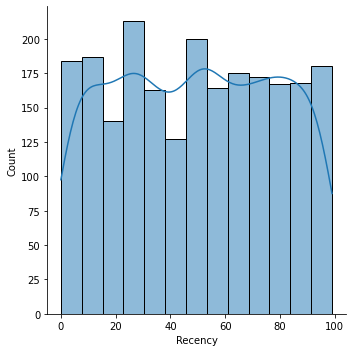

<Figure size 432x288 with 0 Axes>

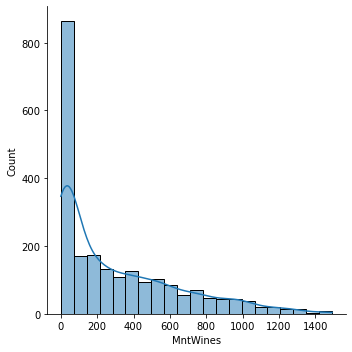

<Figure size 432x288 with 0 Axes>

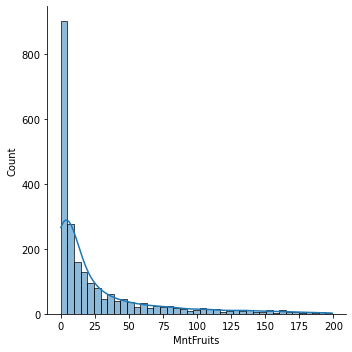

<Figure size 432x288 with 0 Axes>

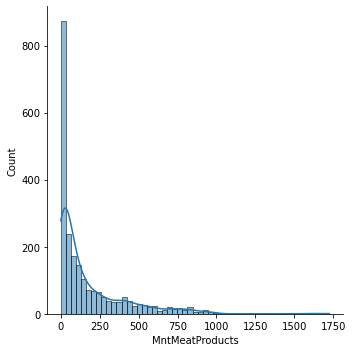

<Figure size 432x288 with 0 Axes>

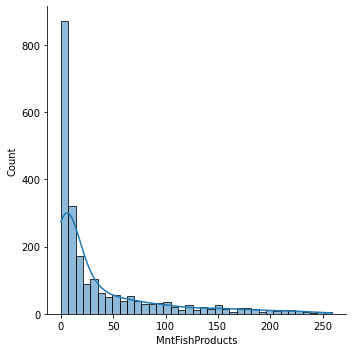

<Figure size 432x288 with 0 Axes>

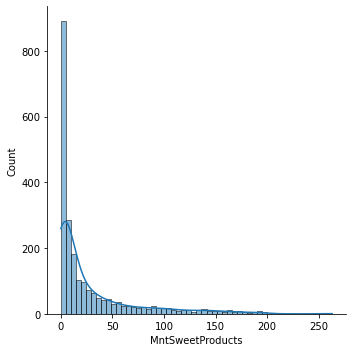

<Figure size 432x288 with 0 Axes>

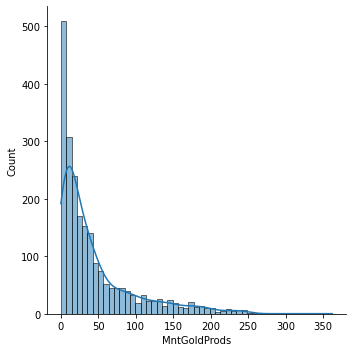

<Figure size 432x288 with 0 Axes>

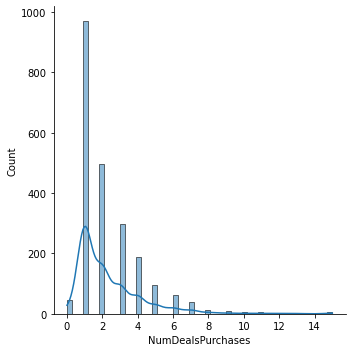

<Figure size 432x288 with 0 Axes>

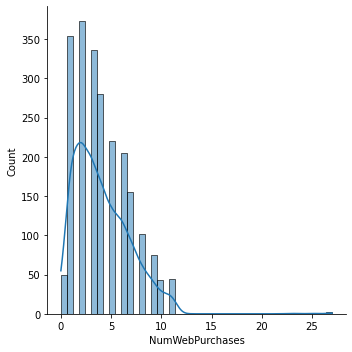

<Figure size 432x288 with 0 Axes>

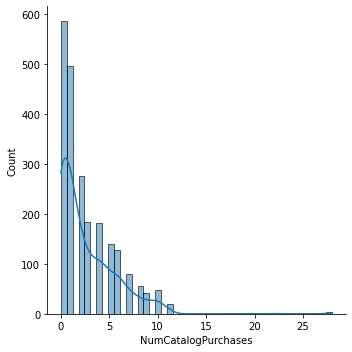

<Figure size 432x288 with 0 Axes>

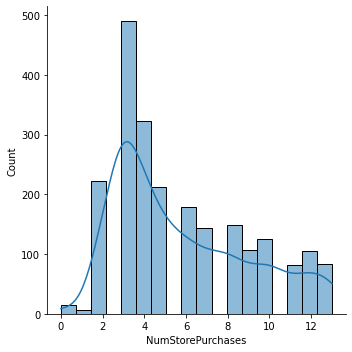

<Figure size 432x288 with 0 Axes>

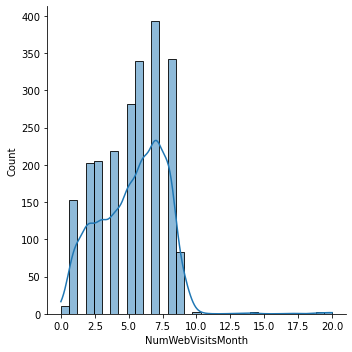

<Figure size 432x288 with 0 Axes>

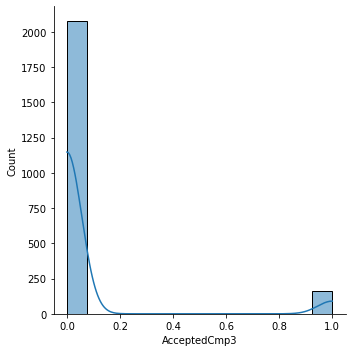

<Figure size 432x288 with 0 Axes>

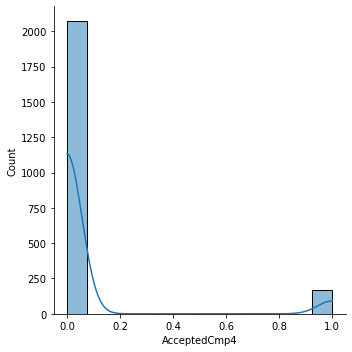

<Figure size 432x288 with 0 Axes>

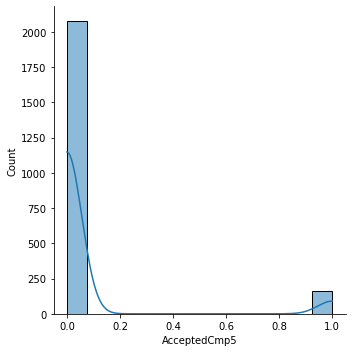

<Figure size 432x288 with 0 Axes>

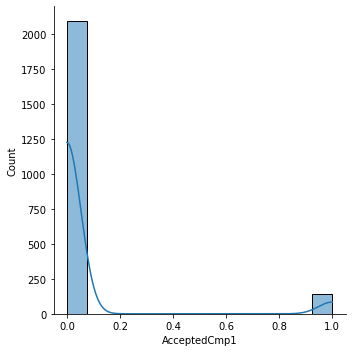

<Figure size 432x288 with 0 Axes>

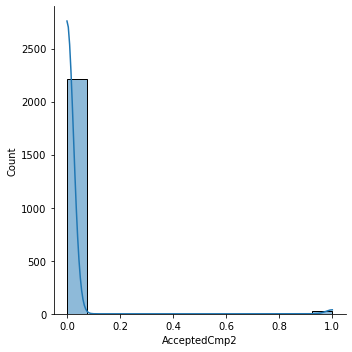

<Figure size 432x288 with 0 Axes>

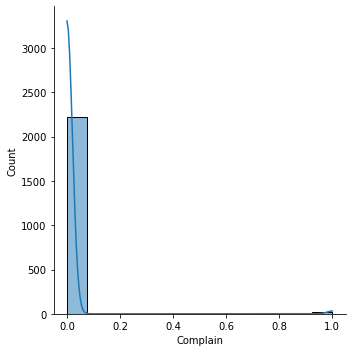

<Figure size 432x288 with 0 Axes>

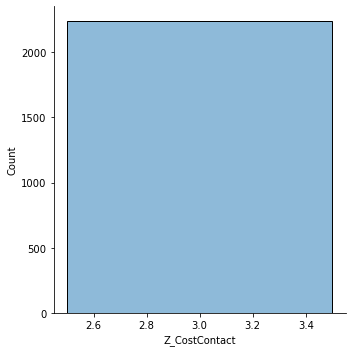

<Figure size 432x288 with 0 Axes>

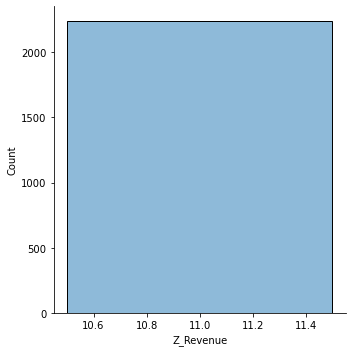

<Figure size 432x288 with 0 Axes>

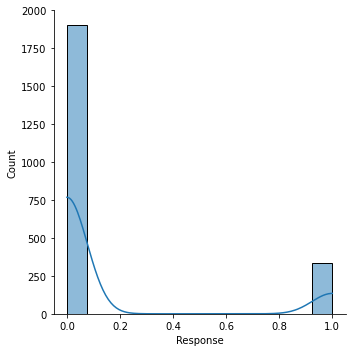

<Figure size 432x288 with 0 Axes>

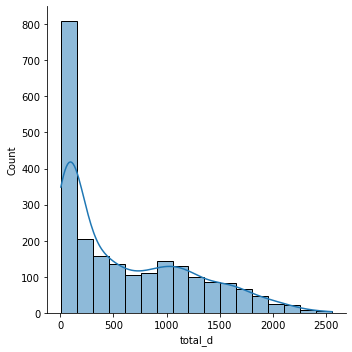

In [30]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.displot(df[col],kde=True)

<AxesSubplot:>

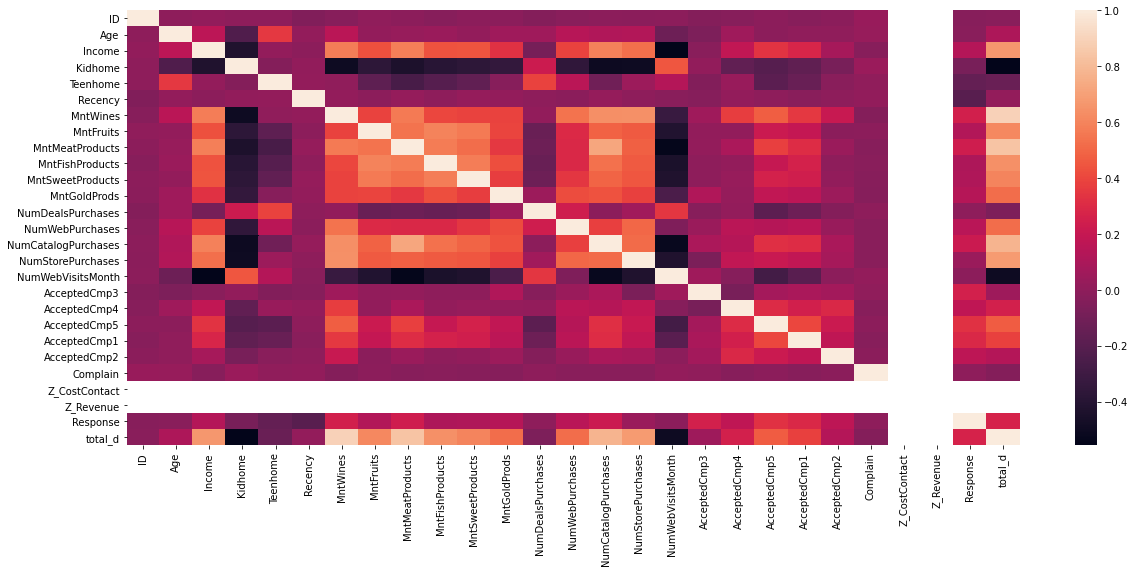

In [31]:
plt.figure(figsize=(20,8))
sns.heatmap(df.select_dtypes(exclude='object').corr())

### Vérification de l'existance de données manquantes 

In [32]:
df.isna().sum().any()

True

### Proportion des données manquantes par colonnes (colonnes) 

In [33]:
missing_rate = df.isna().sum()/df.shape[0]
missing_rate

ID                     0.000000
Age                    0.000000
Education              0.000000
Marital_Status         0.000000
Income                 0.010714
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
total_d                0.000000
dtype: float64

In [34]:
df['Income'].isna().sum()

24

Nous avons une seule variable qui comporte des données manquantes en proportion faible ( moins de 1% du dataset ).
Nous pouvons donc supprimer ces lignes sans affecter notre jeu de données.

### Suppression des données manquantes

In [35]:
df = df.dropna()

### Vérification

In [36]:
df.isna().sum().any()

False

In [37]:
df.select_dtypes(include = object)

Education Marital_Status Dt_Customer
0     Graduation         Single  04-09-2012
1     Graduation         Single  08-03-2014
2     Graduation       Together  21-08-2013
3     Graduation       Together  10-02-2014
4            PhD        Married  19-01-2014
...          ...            ...         ...
2235  Graduation        Married  13-06-2013
2236         PhD       Together  10-06-2014
2237  Graduation       Divorced  25-01-2014
2238      Master       Together  24-01-2014
2239         PhD        Married  15-10-2012

[2216 rows x 3 columns]

### Encodage des variables qualitatives 

In [38]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [39]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [40]:
type(df['Education'])

pandas.core.series.Series

In [41]:
def encodage(df):
    code = {'Basic':0,
            '2n Cycle':1,
            'Graduation':2,
            'Master':3,
            'PhD' :4,
           'Single':0,
           'Together':1,
           'Married':2,
           'Divorced':3,
           'Widow':4,
           'Alone':5,
           'Absurd':6,
           'YOLO':7}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df

In [42]:
encodage(df)

ID  Age  Education  Marital_Status   Income  Kidhome  Teenhome  \
0      5524   64          2               0  58138.0        0         0   
1      2174   67          2               0  46344.0        1         1   
2      4141   56          2               1  71613.0        0         0   
3      6182   37          2               1  26646.0        1         0   
4      5324   40          4               2  58293.0        1         0   
...     ...  ...        ...             ...      ...      ...       ...   
2235  10870   54          2               2  61223.0        0         1   
2236   4001   75          4               1  64014.0        2         1   
2237   7270   40          2               3  56981.0        0         0   
2238   8235   65          3               1  69245.0        0         1   
2239   9405   67          4               2  52869.0        1         1   

      Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0             NaN       58       635         88              546   
1             NaN       38        11          1                6   
2             NaN       26       426         49              127   
3             NaN       26        11          4               20   
4             NaN       94       173         43              118   
...           ...      ...       ...        ...              ...   
2235          NaN       46       709         43              182   
2236          NaN       56       406          0               30   
2237          NaN       91       908         48              217   
2238          NaN        8       428         30              214   
2239          NaN       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0             0             0   
2236                  7             0        

In [43]:
df = df.drop(['Dt_Customer','ID','total_d'],axis=1)

In [44]:
from sklearn.preprocessing import RobustScaler

In [45]:
scaler = RobustScaler()
df_1 = scaler.fit_transform(df)
df = pd.DataFrame(df_1,index = df.index, columns = df.columns)

In [46]:
df

Age  Education  Marital_Status    Income  Kidhome  Teenhome  \
0     0.722222        0.0            -2.0  0.203393      0.0       0.0   
1     0.888889        0.0            -2.0 -0.151645      1.0       1.0   
2     0.277778        0.0            -1.0  0.609034      0.0       0.0   
3    -0.777778        0.0            -1.0 -0.744619      1.0       0.0   
4    -0.611111        2.0             0.0  0.208059      1.0       0.0   
...        ...        ...             ...       ...      ...       ...   
2235  0.166667        0.0             0.0  0.296261      0.0       1.0   
2236  1.333333        2.0            -1.0  0.380279      2.0       1.0   
2237 -0.611111        0.0             1.0  0.168563      0.0       0.0   
2238  0.777778        1.0            -1.0  0.537749      0.0       1.0   
2239  0.888889        2.0             0.0  0.044779      1.0       1.0   

      Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0        0.18  0.957380   2.580645         2.210405         3.404255   
1       -0.22 -0.339917  -0.225806        -0.286705        -0.212766   
2       -0.46  0.522869   1.322581         0.272832         2.106383   
3       -0.46 -0.339917  -0.129032        -0.221965        -0.042553   
4        0.90 -0.003119   1.129032         0.231214         0.723404   
...       ...       ...        ...              ...              ...   
2235    -0.06  1.111227   1.129032         0.527168         0.638298   
2236     0.14  0.481289  -0.258065        -0.175723        -0.255319   
2237     0.84  1.524948   1.290323         0.689017         0.425532   
2238    -0.82  0.527027   0.709677         0.675145         1.446809   
2239    -0.18 -0.188150  -0.161290        -0.032370        -0.212766   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0              2.50000      1.351064                0.5             1.00   
1             -0.21875     -0.393617                0.0            -0.75   
2              0.40625      0.372340               -0.5             1.00   
3             -0.15625     -0.414894                0.0            -0.50   
4              0.59375     -0.202128                1.5             0.25   
...                ...           ...                ...              ...   
2235           3.43750      4.734043                0.0             1.25   
2236          -0.25000     -0.351064                2.5             1.00   
2237           0.12500     -0.010638               -0.5            -0.50   
2238           0.68750      0.776596                0.0             0.50   
2239          -0.21875     -0.074468                0.5            -0.25   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    2.00               -0.2               0.25           0.0   
1                   -0.25               -0.6              -0.25           0.0   
2                    0.00                1.0              -0.50           0.0   
3                   -0.50               -0.2               0.00           0.0   
4                    0.25                0.2              -0.25           0.0   
...                   ...                ...                ...           ...   
2235                 0.25               -0.2              -0.25           0.0   
2236                 0.00                0.0               0.25           0.0   
2237                 0.25                1.6               0.00           0.0   
2238                 0.75                1.0              -0.75           0.0   
2239                -0.25               -0.2               0.25           0.0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0              0.0           0.0           0.0           0.0       0.0   
1              0.0           0.0           0.0           0.0       0.0   
2              0.0           0.0           0.0           0.0       0.0   
3              0.0           0.0           0.0           0.0       0.0   
4

In [56]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,4):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

In [57]:
kmeans.labels_

array([0, 1, 2, ..., 2, 2, 1])

In [58]:
np.unique(kmeans.labels_,return_counts=True)

(array([0, 1, 2]), array([ 554, 1024,  638], dtype=int64))

In [63]:
DF=DF.dropna()


In [64]:
df1=DF.copy()

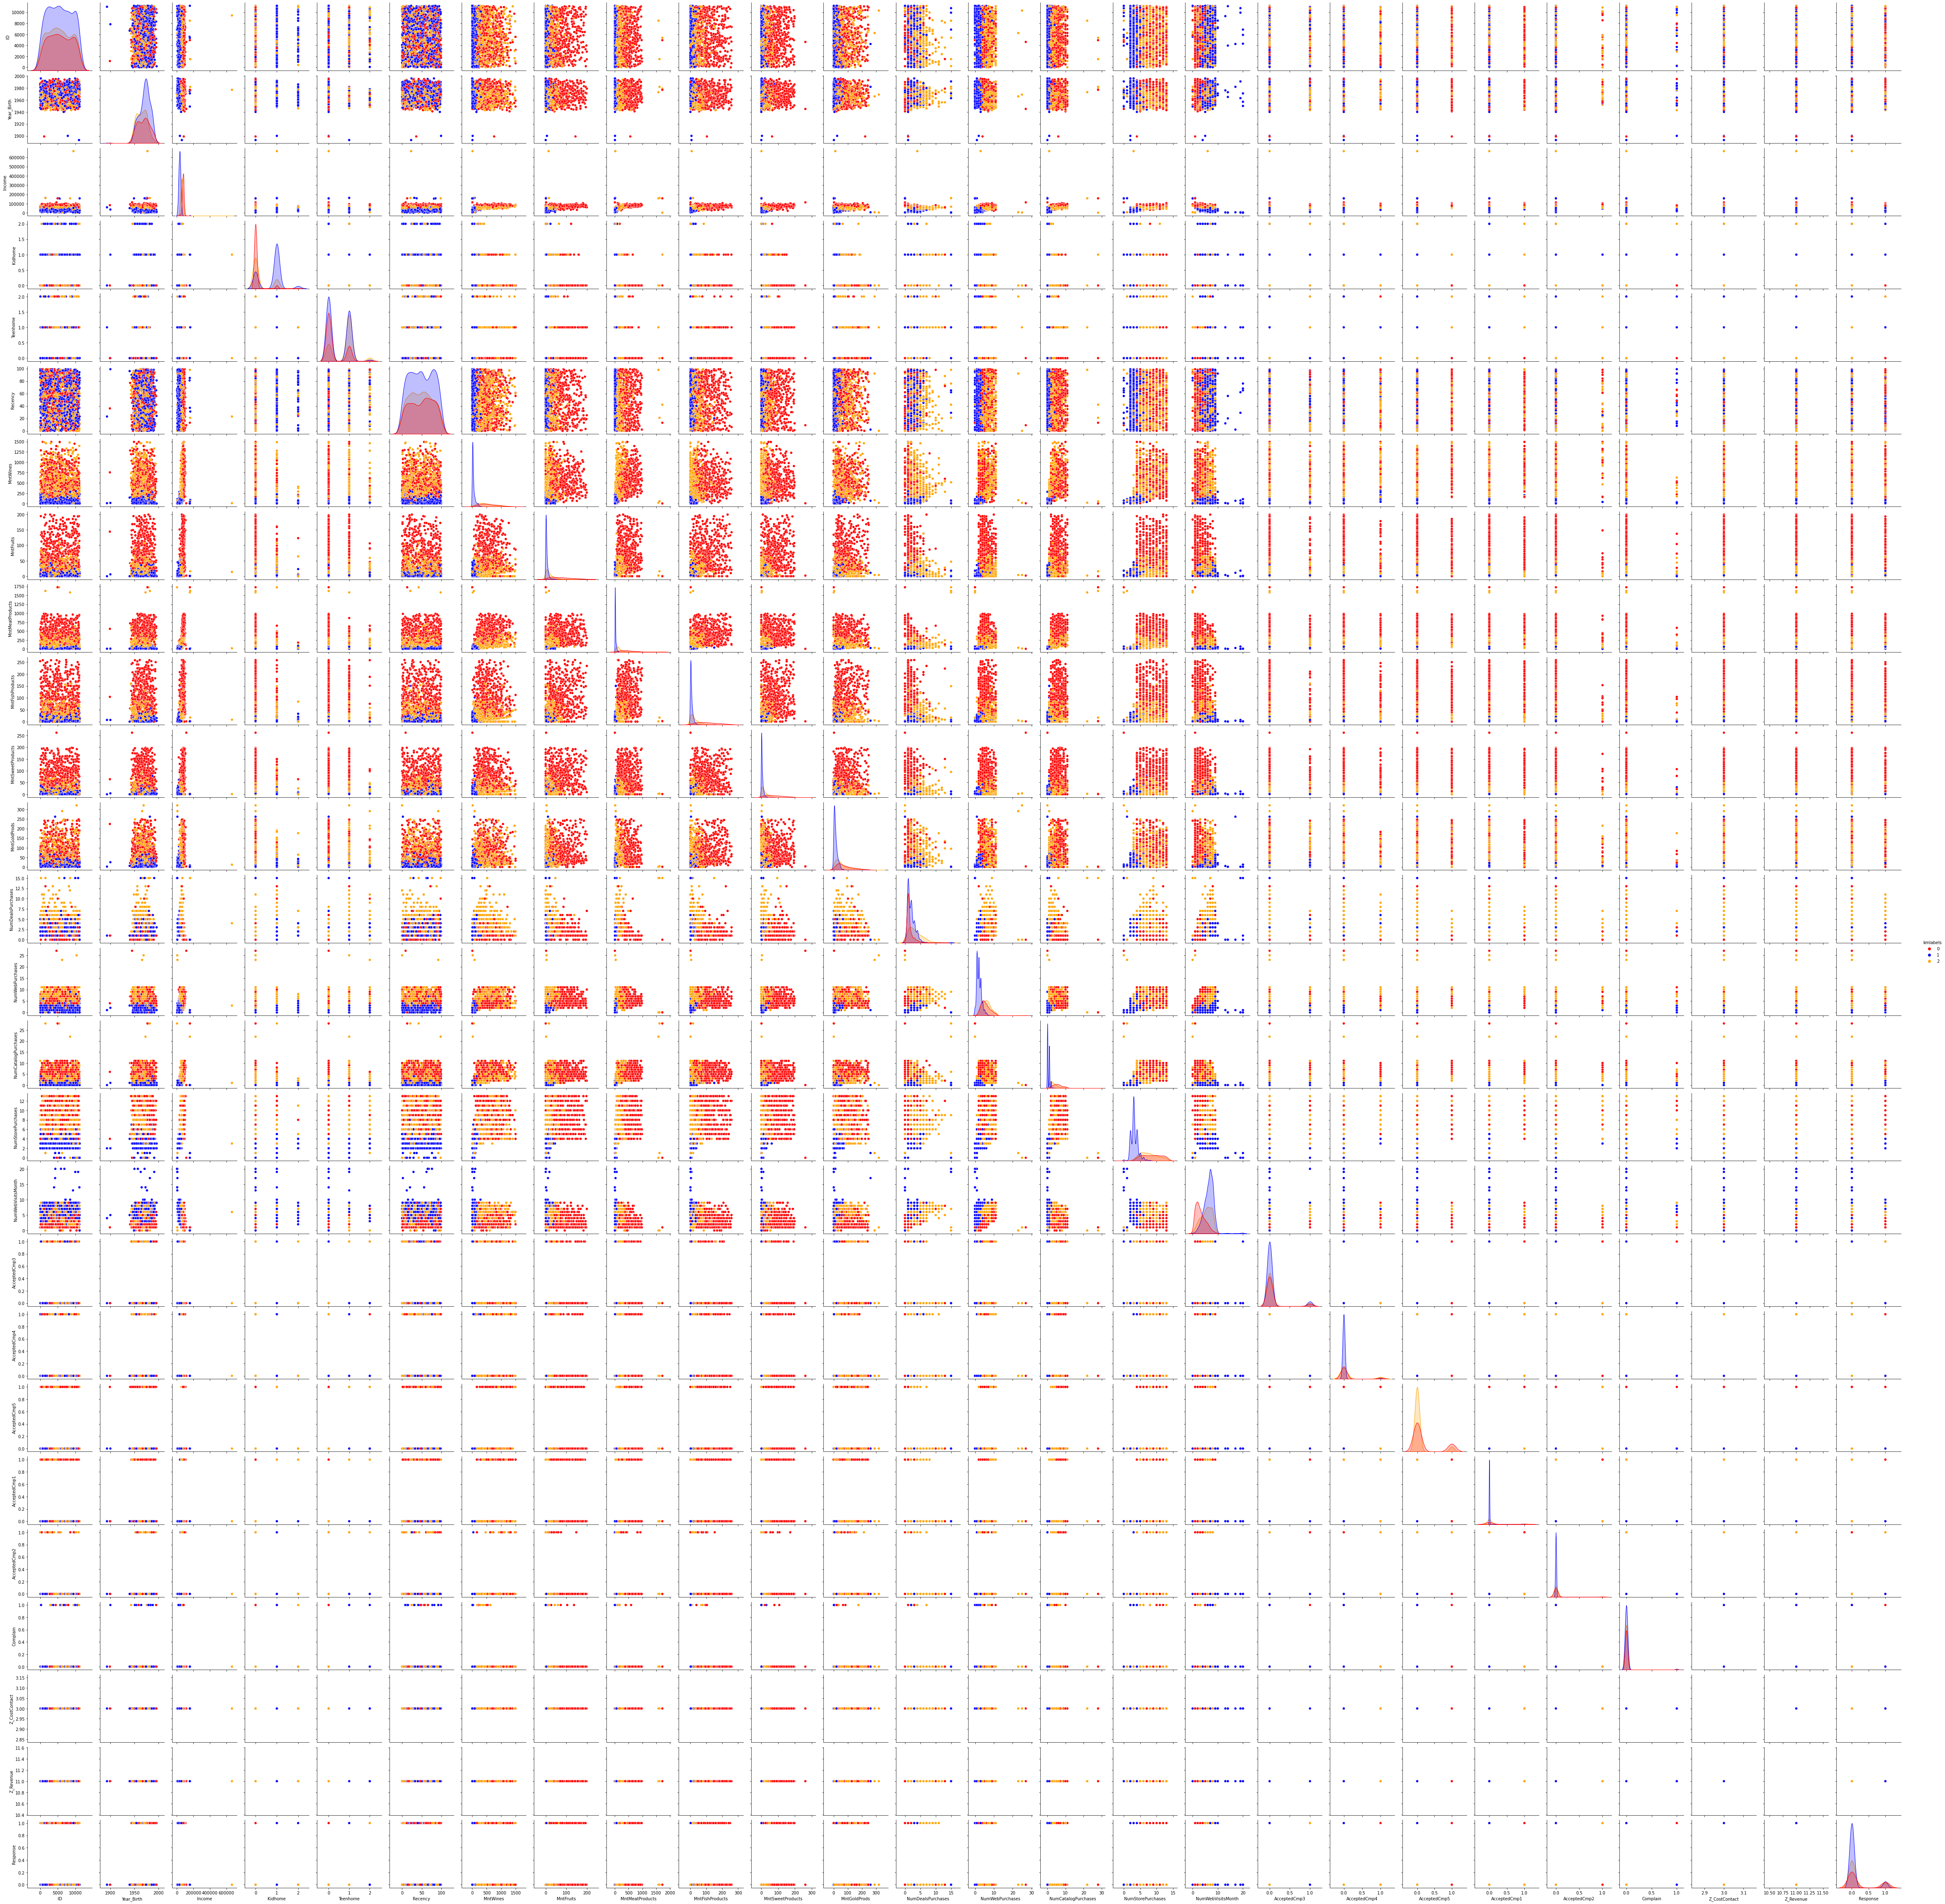

In [65]:
df1['kmlabels']=kmeans.labels_
sns.pairplot(df1,hue="kmlabels",palette={0:'red',1:'blue',2:'orange'})

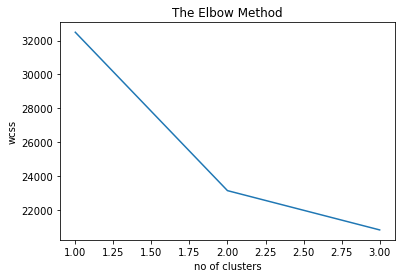

In [66]:
plt.plot(range(1,4), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [67]:
from sklearn.cluster import KMeans

In [68]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(df)

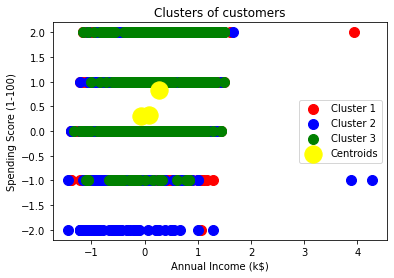

In [69]:
plt.scatter(df.iloc[y_kmeans == 0, 0], df.iloc[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df.iloc[y_kmeans == 1, 0], df.iloc[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df.iloc[y_kmeans == 2, 0], df.iloc[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()